## Importing all the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,jaccard_similarity_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

## Importing the Dataset

In [2]:
df=pd.read_csv('D:\\python\\travel insurance.csv')
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


## Checking if there an null value consist in data set

In [3]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

### As we see there is null values in gender and now we count how many are male and female

In [4]:
df['Gender'].value_counts()

M    9347
F    8872
Name: Gender, dtype: int64

## describtion for age 

In [5]:
df['Age'].describe()

count    63326.000000
mean        39.969981
std         14.017010
min          0.000000
25%         35.000000
50%         36.000000
75%         43.000000
max        118.000000
Name: Age, dtype: float64

## Boxplot of Duration to identify the outliers

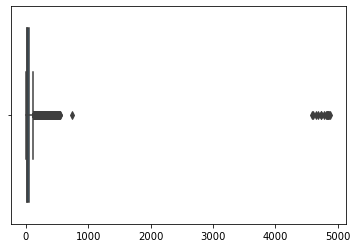

In [6]:
sns.boxplot(df[['Duration']])

## Ploting for Net sales to check the outliers

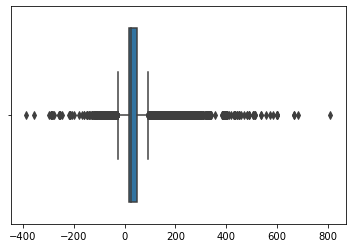

In [7]:
sns.boxplot(df[['Net Sales']])

## Boxplot for commision (in values) to check the outliers

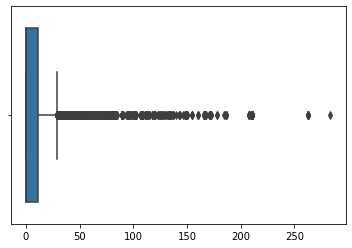

In [8]:
sns.boxplot(df[['Commision (in value)']])

In [9]:
df['Age'].describe()

count    63326.000000
mean        39.969981
std         14.017010
min          0.000000
25%         35.000000
50%         36.000000
75%         43.000000
max        118.000000
Name: Age, dtype: float64

## As we can see that there are some values which have travel insurance those have age 0 and 118 so we drop that values

In [10]:
df=df[df.Age!=118]
df=df[df.Age!=0]

In [12]:
df['Duration'].describe() 

count    62340.000000
mean        49.637713
std        102.467238
min          0.000000
25%          9.750000
50%         23.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

### Removing the outliers aw we above from Duration,NetSales,Commision(in value)

In [13]:
df = df[(df['Duration'] < 500)]
df[(df['Net Sales'] > 400)].count()
df[(df['Commision (in value)'] > 150)].count()

Agency                  162
Agency Type             162
Distribution Channel    162
Product Name            162
Claim                   162
Duration                162
Destination             162
Net Sales               162
Commision (in value)    162
Gender                  142
Age                     162
dtype: int64

In [14]:
df = df[(df['Net Sales'] > -200)]
df = df[(df['Net Sales'] < 400)]
df = df[(df['Commision (in value)'] < 150)]

In [15]:
# df=df[df.Duration!=0]

## Stastical Describtion of the dataset

In [16]:

df.describe()

,Duration,Net Sales,Commision (in value),Age
count,62091.000000,62091.000000,62091.000000,62091.000000
mean,47.493195,39.733639,9.094935,38.731233
std,71.871889,45.223414,17.296995,10.085322
min,0.000000,-198.000000,0.000000,1.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.000000,0.000000,36.000000
75%,53.000000,47.000000,10.500000,42.000000
max,497.000000,399.600000,149.500000,88.000000


### data Visulaization of the particular features

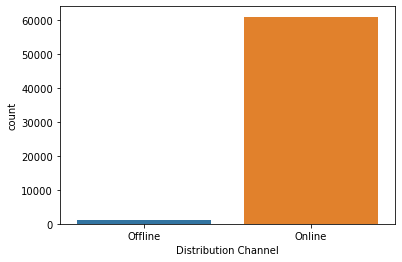

In [17]:
sns.countplot(x='Distribution Channel',data=df)

### As we can see here there no value are way greater than yes in term of claim

In [18]:
df['Claim'].value_counts()

No     61189
Yes      902
Name: Claim, dtype: int64

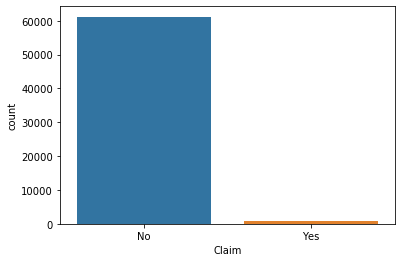

In [19]:
sns.countplot(x='Claim',data=df)

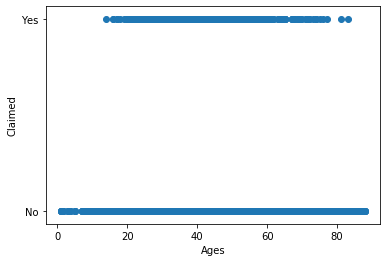

In [20]:
plt.scatter(df.Age,df.Claim)
plt.xlabel('Ages')
plt.ylabel('Claimed')
plt.show()

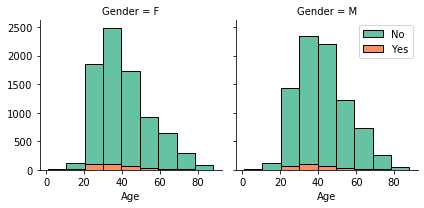

In [21]:
bins = np.linspace(df.Age.min(), df.Age.max(),10)
g = sns.FacetGrid(df, col='Gender',hue='Claim', palette='Set2', col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec='k')

g.axes[-1].legend()
plt.show()

### now are updating the value gender as this is binary categorical data

In [22]:
df.Gender[df.Gender=='M']=1
df.Gender[df.Gender=='F']=0


C:\Users\Rageshwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
df.Gender.value_counts()

1    8685
0    8479
Name: Gender, dtype: int64

### in this we are making the binary dummies of the particular categorical coln

In [24]:
dummies=pd.get_dummies(df['Distribution Channel'])
dummies

,Offline,Online
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
63321,0,1
63322,0,1
63323,0,1
63324,0,1


In [25]:
df=pd.concat([df,dummies],axis='columns')

In [26]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Offline,Online
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,0,81,1,0
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,0,71,1,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32,0,1
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32,0,1
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41,0,1


In [27]:
### we conact the dummies value with the orignal data
### now we make the array the independent value

In [28]:
x=df[['Duration','Net Sales','Age','Offline']].values
x

array([[186. , -29. ,  81. ,   1. ],
       [186. , -29. ,  71. ,   1. ],
       [ 65. , -49.5,  32. ,   0. ],
       ...,
       [  2. ,  18. ,  57. ,   0. ],
       [  3. ,  18. ,  63. ,   0. ],
       [ 22. ,  26. ,  35. ,   0. ]])

### using of label encoder on the variable claim and take it as dependent variable

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Claim'] = le.fit_transform(df['Claim'])
y = df['Claim'].values


### Spliting the x,y into train and test 

In [30]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=3)

In [31]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(49672, 4)
(12419, 4)
(49672,)
(12419,)


### now we are using here the standard scaling here to minimize the scaling 

In [32]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[ 1.92715012, -1.51988067,  4.191151  ,  7.808141  ],
       [ 1.92715012, -1.51988067,  3.19960303,  7.808141  ],
       [ 0.24358544, -1.97318932, -0.66743406, -0.12807146],
       [ 0.17401665, -1.75427441, -0.66743406, -0.12807146],
       [ 0.43837805, -1.31644459,  0.22495911, -0.12807146]])

### Now we are using the Logistic Regression and Fitting the model

In [33]:
lr=LogisticRegression(C=0.01)

In [34]:
lr.fit(train_x,train_y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### we are predicting the value of test_x

In [35]:
y_pre=lr.predict(test_x)

In [36]:
y_pre[0:5]

array([0, 0, 0, 0, 0])

In [37]:
test_y[0:5]

array([0, 0, 0, 0, 0])

### cecking the score and probality 

In [38]:
lr.score(test_x,test_y)

0.9851034704887672

In [39]:
y_pre_prob=lr.predict_proba(test_x)
y_pre_prob

array([[0.99306951, 0.00693049],
       [0.98799901, 0.01200099],
       [0.98747157, 0.01252843],
       ...,
       [0.98882803, 0.01117197],
       [0.99105908, 0.00894092],
       [0.98586636, 0.01413364]])

### importing the confusion matrix and priting the confusion matrix

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
cnf_matrix=confusion_matrix(test_y,y_pre,labels=[1,0])

In [41]:
print(cnf_matrix)

[[    0   185]
 [    0 12234]]


In [42]:
print(classification_report(test_y,y_pre))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12234
           1       0.00      0.00      0.00       185

    accuracy                           0.99     12419
   macro avg       0.49      0.50      0.50     12419
weighted avg       0.97      0.99      0.98     12419



C:\Users\Rageshwar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


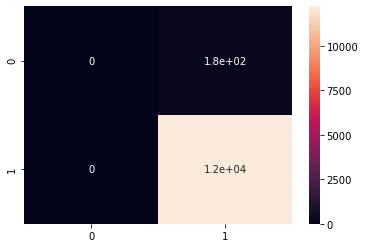

In [43]:
sns.heatmap(cnf_matrix, annot=True,)

In [ ]:
## This AUC-ROC curve shows that 70% percent chance that model can distinguish 
## between positive class and negative class.

In [56]:
import sklearn.metrics as metrics
pred=y_pre_prob[:,1]
fpr,tpr,threshold=metrics.roc_curve(test_y,pred)
roc_auc=metrics.auc(fpr,tpr)

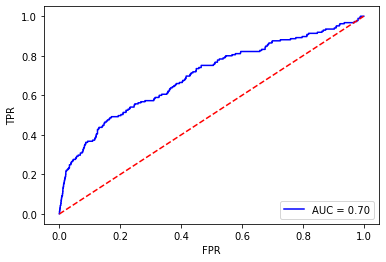

In [57]:
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

### printing the score

In [44]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,jaccard_similarity_score

In [45]:
scores=pd.DataFrame({"Score":[accuracy_score(test_y,y_pre),
                             precision_score(test_y,y_pre),
                             precision_score(test_y, y_pre,pos_label=0),
                             recall_score(test_y,y_pre),
                             recall_score(test_y,y_pre,pos_label=0),
                             f1_score(test_y,y_pre),
                             jaccard_similarity_score(test_y,y_pre)]},
                   index=['Accuracy Score','Percision Score','Percision Label 0','Recall Score','Recall label=0','F1-Score','Jaccard Similarty Score'])
scores

C:\Users\Rageshwar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rageshwar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


,Score
Accuracy Score,0.985103
Percision Score,0.000000
Percision Label 0,0.985103
Recall Score,0.000000
Recall label=0,1.000000
F1-Score,0.000000
Jaccard Similarty Score,0.985103
